# FraudGuard

## Importing Libraries, Models & Balancing techniques

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Balancing techniques
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


## Loading the Dataset

In [ ]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

## Exploratory Data Analysis

In [ ]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df['Class'].value_counts()


,count
Class,
0,284315
1,492


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<Axes: xlabel='Class', ylabel='count'>

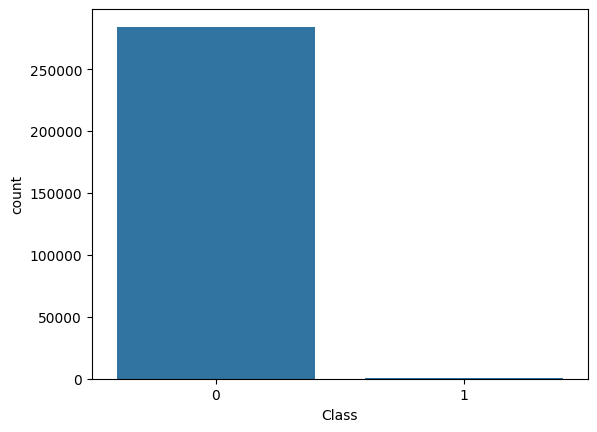

In [ ]:
sns.countplot(x="Class", data=df)


## Data Preprocessing

In [ ]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balancing the dataset with undersampling + SMOTE
undersample = RandomUnderSampler(sampling_strategy=0.05, random_state=42)
X_under, y_under = undersample.fit_resample(X_scaled, y)

smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_under, y_under)


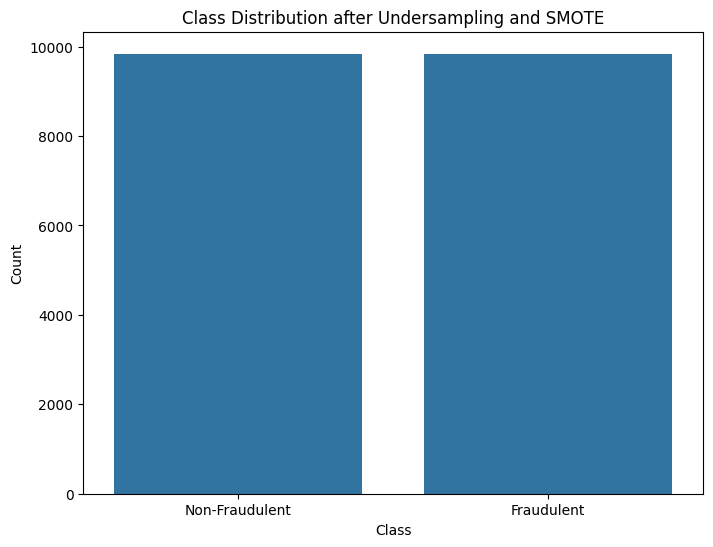

In [ ]:
# Visualize class distribution after undersampling + SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution after Undersampling and SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

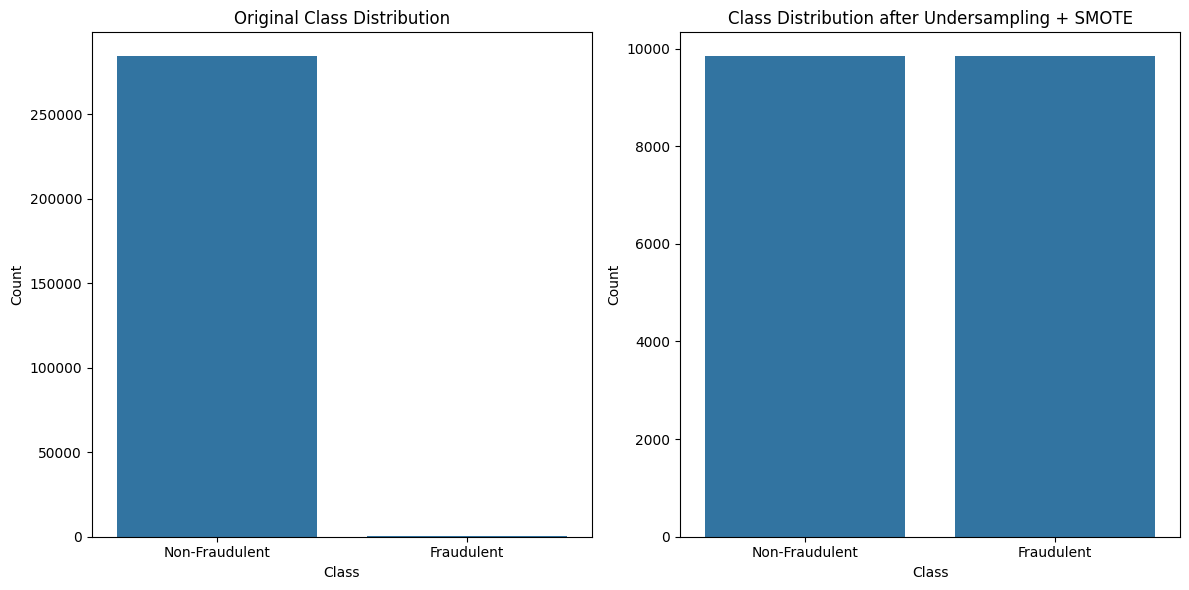

In [ ]:
# Plot before and after resampling
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original data distribution
sns.countplot(ax=axes[0], x=y)
axes[0].set_title('Original Class Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Non-Fraudulent', 'Fraudulent'])

# Resampled data distribution
sns.countplot(ax=axes[1], x=y_resampled)
axes[1].set_title('Class Distribution after Undersampling + SMOTE')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Non-Fraudulent', 'Fraudulent'])

plt.tight_layout()
plt.show()


## Train-Test Split

In [ ]:
# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
# Check the distribution of the target variable after resampling
value_counts = y_resampled.value_counts()
print(value_counts)


Class
0    9840
1    9840
Name: count, dtype: int64


## Logistic Regression

In [ ]:
# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

In [ ]:
# Evaluate performance
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1973
           1       0.97      0.90      0.94      1963

    accuracy                           0.94      3936
   macro avg       0.94      0.94      0.94      3936
weighted avg       0.94      0.94      0.94      3936



In [ ]:
# Tune Logistic Regression
log_reg_tuned = LogisticRegression(C=0.1, random_state=42)
log_reg_tuned.fit(X_train, y_train)
y_pred_log_tuned = log_reg_tuned.predict(X_test)

# Evaluate
print("Tuned Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log_tuned))

Tuned Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1973
           1       0.98      0.90      0.94      1963

    accuracy                           0.94      3936
   macro avg       0.94      0.94      0.94      3936
weighted avg       0.94      0.94      0.94      3936



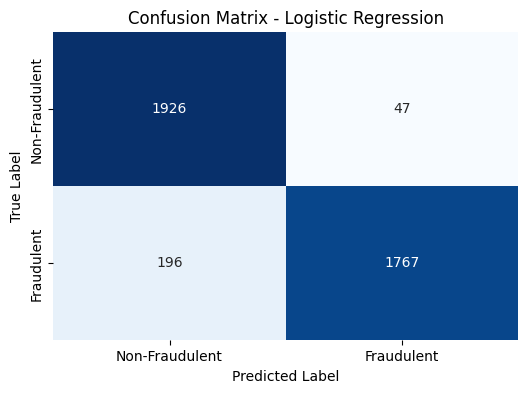

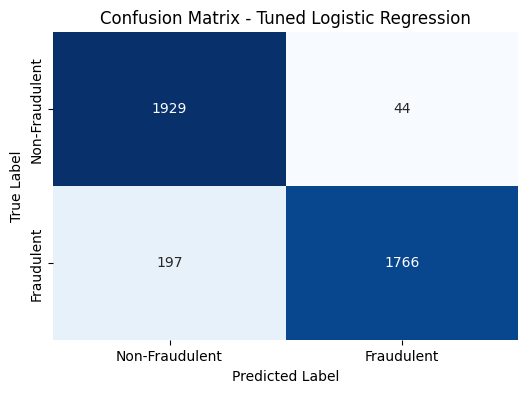

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for default Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)

# Visualization of confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Fraudulent', 'Fraudulent'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

# Confusion matrix for tuned Logistic Regression
cm_log_tuned = confusion_matrix(y_test, y_pred_log_tuned)

# Visualization of confusion matrix for tuned Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_tuned, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Tuned Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Fraudulent', 'Fraudulent'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


## KNN

In [ ]:
# Initialize KNN model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

In [ ]:
# Evaluate performance
print("KNN Performance:")
print(classification_report(y_test, y_pred_knn))


KNN Performance:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1973
           1       0.98      1.00      0.99      1963

    accuracy                           0.99      3936
   macro avg       0.99      0.99      0.99      3936
weighted avg       0.99      0.99      0.99      3936



In [ ]:
# Tune KNN by adjusting n_neighbors
knn_tuned = KNeighborsClassifier(n_neighbors=3)
knn_tuned.fit(X_train, y_train)
y_pred_knn_tuned = knn_tuned.predict(X_test)

# Evaluate
print("Tuned KNN Performance:")$
print(classification_report(y_test, y_pred_knn_tuned))

Tuned KNN Performance:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1973
           1       0.98      1.00      0.99      1963

    accuracy                           0.99      3936
   macro avg       0.99      0.99      0.99      3936
weighted avg       0.99      0.99      0.99      3936



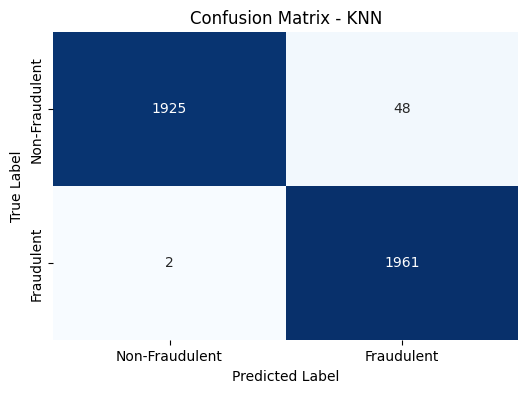

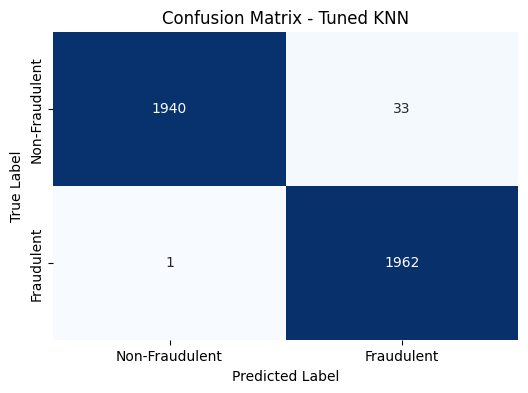

In [ ]:
# Confusion matrix for default KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Visualization of confusion matrix for default KNN
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Fraudulent', 'Fraudulent'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

# Confusion matrix for tuned KNN
cm_knn_tuned = confusion_matrix(y_test, y_pred_knn_tuned)

# Visualization of confusion matrix for tuned KNN
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn_tuned, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Tuned KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Fraudulent', 'Fraudulent'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

## SVM

In [ ]:
# Initialize SVM model
svm = SVC(kernel='linear', random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)


In [ ]:
# Evaluate performance
print("SVM Performance:")
print(classification_report(y_test, y_pred_svm))


SVM Performance:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1973
           1       0.97      0.90      0.94      1963

    accuracy                           0.94      3936
   macro avg       0.94      0.94      0.94      3936
weighted avg       0.94      0.94      0.94      3936



In [ ]:
# Tune SVM with RBF kernel and adjust C
svm_tuned = SVC(kernel='rbf', C=1.0, random_state=42)
svm_tuned.fit(X_train, y_train)
y_pred_svm_tuned = svm_tuned.predict(X_test)

# Evaluate
print("Tuned SVM Performance:")
print(classification_report(y_test, y_pred_svm_tuned))


Tuned SVM Performance:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1973
           1       0.98      0.90      0.94      1963

    accuracy                           0.94      3936
   macro avg       0.95      0.94      0.94      3936
weighted avg       0.95      0.94      0.94      3936



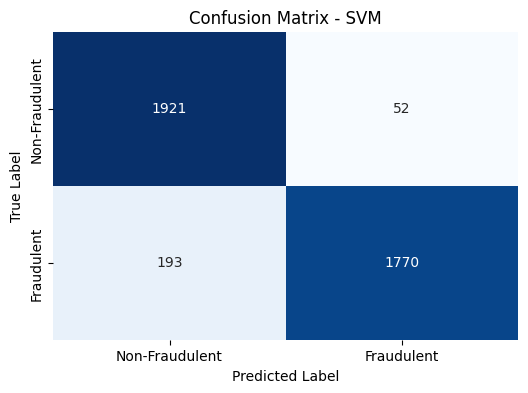

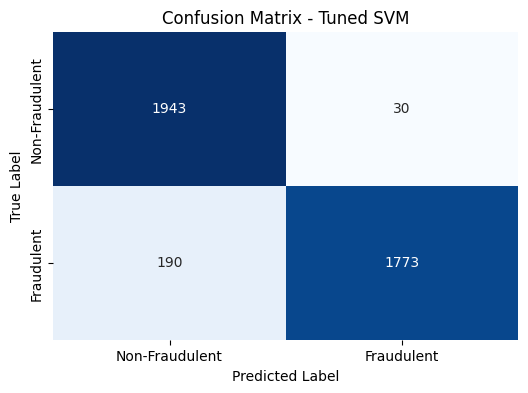

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for default SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Visualization of confusion matrix for default SVM
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Fraudulent', 'Fraudulent'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

# Confusion matrix for tuned SVM
cm_svm_tuned = confusion_matrix(y_test, y_pred_svm_tuned)

# Visualization of confusion matrix for tuned SVM
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm_tuned, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Tuned SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Fraudulent', 'Fraudulent'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


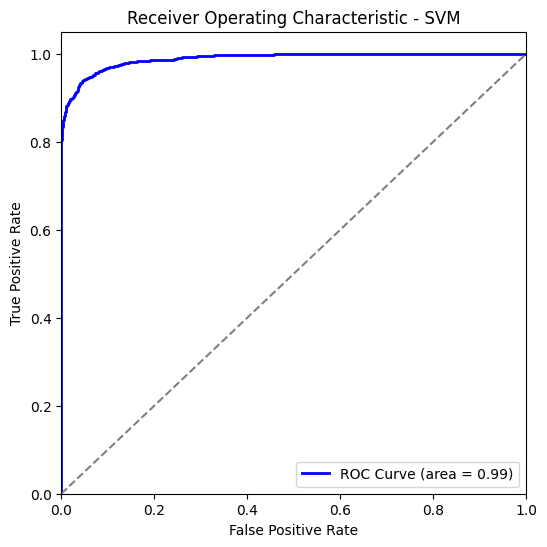

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the decision function for the default SVM model
y_scores_svm = svm.decision_function(X_test)

# Compute ROC curve and AUC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc="lower right")
plt.show()


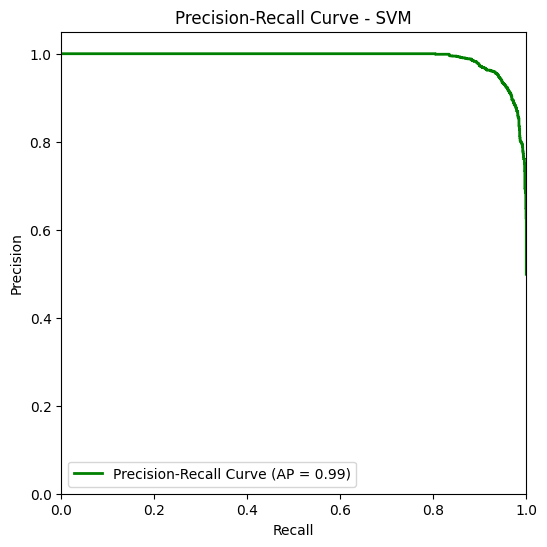

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall curve for default SVM
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_scores_svm)
average_precision_svm = average_precision_score(y_test, y_scores_svm)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall_svm, precision_svm, color='green', lw=2, label=f'Precision-Recall Curve (AP = {average_precision_svm:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM')
plt.legend(loc="lower left")
plt.show()


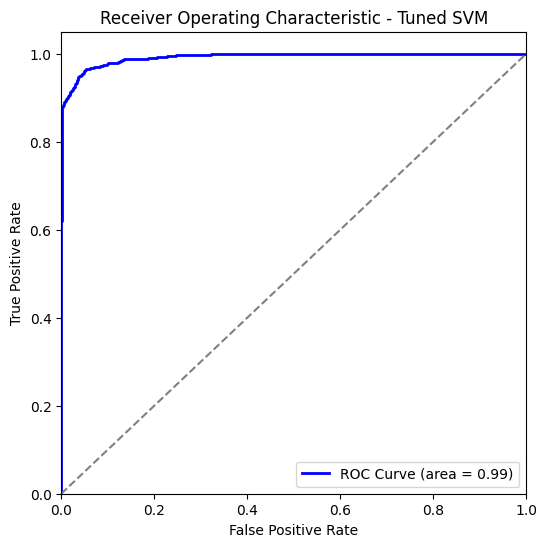

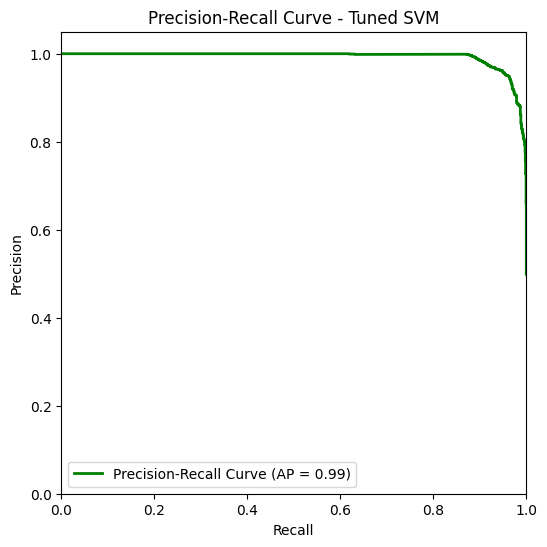

In [ ]:
# Decision function for tuned SVM model
y_scores_svm_tuned = svm_tuned.decision_function(X_test)

# ROC curve for tuned SVM
fpr_svm_tuned, tpr_svm_tuned, _ = roc_curve(y_test, y_scores_svm_tuned)
roc_auc_svm_tuned = auc(fpr_svm_tuned, tpr_svm_tuned)

# Plot ROC curve for tuned SVM
plt.figure(figsize=(6, 6))
plt.plot(fpr_svm_tuned, tpr_svm_tuned, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc_svm_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Tuned SVM')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve for tuned SVM
precision_svm_tuned, recall_svm_tuned, _ = precision_recall_curve(y_test, y_scores_svm_tuned)
average_precision_svm_tuned = average_precision_score(y_test, y_scores_svm_tuned)

# Plot Precision-Recall curve for tuned SVM
plt.figure(figsize=(6, 6))
plt.plot(recall_svm_tuned, precision_svm_tuned, color='green', lw=2, label=f'Precision-Recall Curve (AP = {average_precision_svm_tuned:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Tuned SVM')
plt.legend(loc="lower left")
plt.show()


## Decision Tree

In [ ]:
# Initialize Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)

# Train the model
dtree.fit(X_train, y_train)

# Make predictions
y_pred_dtree = dtree.predict(X_test)


In [ ]:
# Evaluate performance
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dtree))


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1973
           1       0.97      0.98      0.97      1963

    accuracy                           0.97      3936
   macro avg       0.97      0.97      0.97      3936
weighted avg       0.97      0.97      0.97      3936



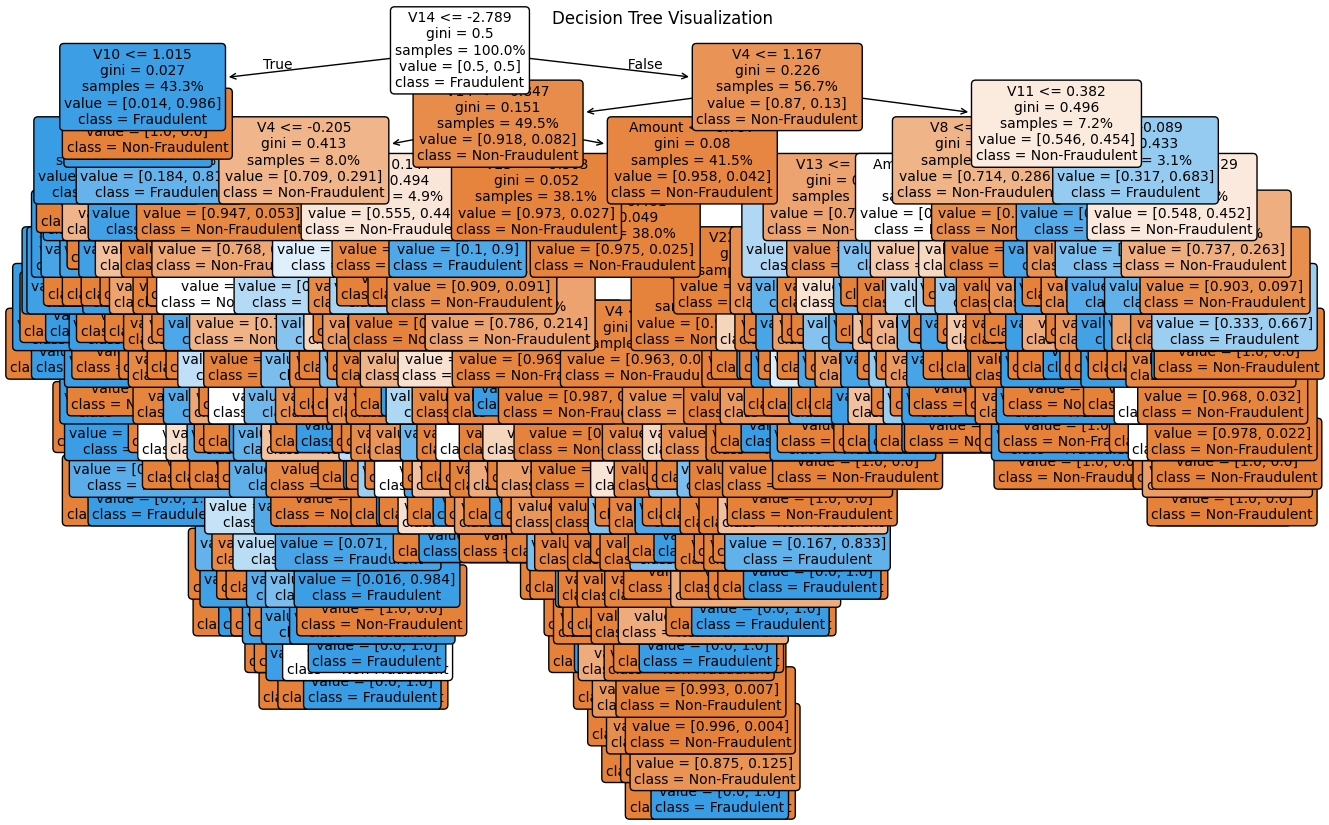

In [ ]:
feature_names = df.drop('Class', axis=1).columns
# Plot the tree with manual feature names
plt.figure(figsize=(15, 10))
plot_tree(dtree,
          feature_names=feature_names,
          class_names=['Non-Fraudulent', 'Fraudulent'],  # Class names
          filled=True,
          rounded=True,
          proportion=True,
          fontsize=10)

plt.title("Decision Tree Visualization")
plt.show()


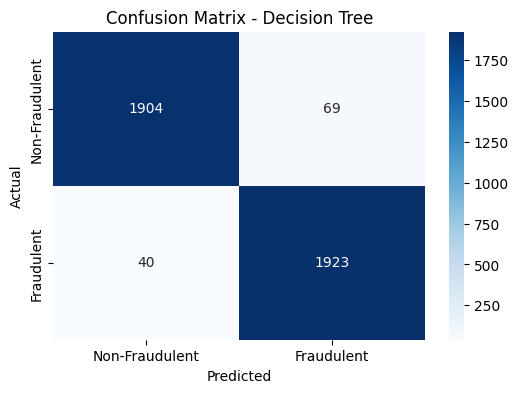

In [ ]:
# Generate the confusion matrix
cm_dtree = confusion_matrix(y_test, y_pred_dtree)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()



